Shyam Kumar Ray Yadav (18449154)

Sonu Kumar (15651099)

Ahmad Raza Khawaja (25848862)

# Problem Sheet 7

## Exercise 6.1: dimensionality reduction on histograms.

In this problem, we study in more detail the ability of PCA to meaningfully reduce a dataset of histograms when the standard Euclidean distance is used between the histograms.

1. First we generate an example dataset. Based on example code from the lecture, write a function that generates a histogram of samples from a normal distribution for given standard deviation $\sigma$ and mean $\mu$. Set the number of samples to $n$ = 10000 and fix the bins to be 100 uniform bins on the interval [−4, 4]. Then write a function which, for a single fixed value of $\sigma$, returns a list/array of histograms for all $\mu$ $\in$ ```np.linspace(-1,1,num=21)```. The output of this function should be an array of shape 21 × 100. Finally, generate these lists of histograms for $\sigma$ $\in$ $S := [0.8, 0.4, 0.2, 0.1]$. Subsequently, we will analyze theses lists of histograms separately with PCA, similar as in the lecture.

In [133]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [112]:
#Function to generate a histogram.
def generate_histogram(mu, sigma, n=10000, bins=100, range=(-4,4)):
    """
    Generate a histogram of samples from a normal distribution.

    Parameters. 
    mu = means of normal distributions
    sigma = standard deviations of normal distributions.
    n = total number of sample
    bins = number of bins within a histogram
    range = lower and upper range of the bins. 

    Returns:
    hist (ndarray): The values of a histogram
    """

    #Generate n samples with mu mean and sigma std. from a normal distribution.
    samples = np.random.normal(mu, sigma, n)

    #Compute histogram
    hist, bin_edges = np.histogram(samples, bins=bins, range=range, density=True)
    
    return hist


Means: [-1.  -0.9 -0.8 -0.7 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1  0.   0.1  0.2  0.3
  0.4  0.5  0.6  0.7  0.8  0.9  1. ]
The shape of a histogram for a single mean is: (100,)
This is a histogram for single mean and standard deviation:
 [0.00125025 0.00125025 0.0025005  0.00125025 0.00125025 0.00125025
 0.0025005  0.00875175 0.010002   0.010002   0.015003   0.020004
 0.0125025  0.02875575 0.0275055  0.055011   0.0625125  0.055011
 0.09376875 0.1025205  0.13002601 0.15503101 0.17753551 0.17753551
 0.20004001 0.22754551 0.29505901 0.32256451 0.32381476 0.36882376
 0.40008002 0.41133227 0.43758752 0.43508702 0.48634727 0.45509102
 0.49509902 0.47884577 0.48759752 0.48134627 0.45509102 0.43258652
 0.40883177 0.42383477 0.39132827 0.38132627 0.33006601 0.28505701
 0.29630926 0.26130226 0.23504701 0.18003601 0.17628526 0.13502701
 0.10002    0.1075215  0.08126625 0.0725145  0.0675135  0.055011
 0.04125825 0.03875775 0.020004   0.020004   0.015003   0.01125225
 0.005001   0.00375075 0.00125025 0.002

(array([55.,  8.,  5.,  5.,  3.,  4.,  3.,  3.,  7.,  7.]),
 array([0.        , 0.0495099 , 0.0990198 , 0.14852971, 0.19803961,
        0.24754951, 0.29705941, 0.34656931, 0.39607922, 0.44558912,
        0.49509902]),
 <BarContainer object of 10 artists>)

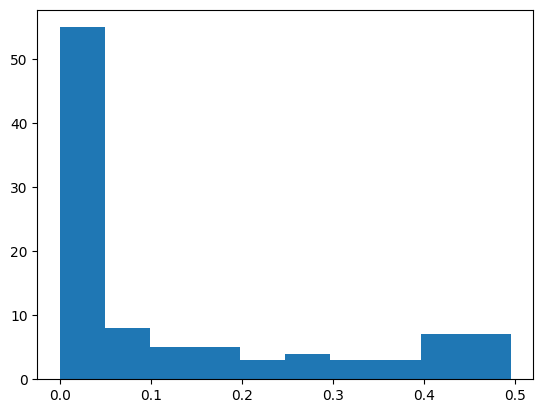

In [113]:
#Use means and standard deviations for calling a function to generate a histogram.
means = np.linspace(-1, 1, num = 21)
stds = [0.8, 0.4, 0.2, 0.1]
histogram = generate_histogram(-1, 0.80)

print("Means:", means) 
print("The shape of a histogram for a single mean is:",histogram.shape)
print("This is a histogram for single mean and standard deviation:\n", histogram)
plt.hist(histogram)

In [114]:
#Creating a second function to generate a list of histograms for a single sigma value and different means. 
def histograms_list(mu, sigma):
    histograms_list_created = []
    
    for means in mu:
        histogram_created = generate_histogram(means, sigma)
        histograms_list_created.append(histogram_created)
        
    # histograms_list = np. array(histograms_list) #list to array conversion for later easy iteration. 
    return histograms_list_created

In [118]:
means_histograms_list = histograms_list(means, 0.8)
print("Sample of histograms lists for different means for a single value of sigma:\n",means_histograms_list)

Sample of histograms lists for different means for a single value of sigma:
 [array([0.     , 0.00125, 0.     , 0.00125, 0.00125, 0.00375, 0.00625,
       0.005  , 0.01   , 0.00875, 0.0125 , 0.01875, 0.0275 , 0.0375 ,
       0.0425 , 0.045  , 0.0675 , 0.0675 , 0.07375, 0.0925 , 0.1175 ,
       0.13375, 0.155  , 0.16375, 0.20375, 0.235  , 0.22125, 0.2875 ,
       0.30125, 0.3575 , 0.37375, 0.43625, 0.49625, 0.44875, 0.44375,
       0.49125, 0.50875, 0.5    , 0.48375, 0.4975 , 0.4775 , 0.4325 ,
       0.48375, 0.4225 , 0.3775 , 0.3825 , 0.34   , 0.32875, 0.2725 ,
       0.26375, 0.20375, 0.19125, 0.17625, 0.14375, 0.12625, 0.1025 ,
       0.07125, 0.06125, 0.05375, 0.05125, 0.03375, 0.03   , 0.02875,
       0.0175 , 0.01   , 0.01625, 0.00625, 0.0025 , 0.0025 , 0.0025 ,
       0.00375, 0.     , 0.0025 , 0.     , 0.     , 0.     , 0.0025 ,
       0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
       0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
       0.   

In [129]:
#Generating the list of histograms for different values of sigma 

#Dictinary is created where each sigma value is the key and a list of histograms for different means are the values.
all_histograms = {} 
for std in stds:
    all_histograms[std]  = histograms_list(means, std) 

# print(all_histograms)

2. For each $\sigma \in S$, apply PCA to the corresponding list of histograms. Show the eigenvalues in a combined plot, with a focus on comparing the largest eigenvalues of each dataset. How do the dominant eigenvalues differ? How does the approximate dimensionality of the dataset depend on $\sigma$?

In [177]:
#Analyzing the histograms with PCA. 
def analyze_histogram_with_pca(histogram, n_components=2):
    """
    n_components (int) = Number of principal components to keep
    pca_result (ndarray) = Number of prinicipal components to keep.
    explained_variance = The amount of variance explained by each of the selected components. 
    """
    pca = PCA(n_components = n_components) #Initialize PCA
    pca_result = pca.fit_transform(histogram) #Fit PCA on histogram and transform the data

    #Get the largest eigenvalues of histograms for  each σ.
    eigen_values = pca.explained_variance_ #Getting the largest eigenvalues of each dataset.
    return pca_result, eigen_values

In [178]:
analyze_histogram_with_pca(all_histograms[0.8])

(array([[-1.29804147,  0.61191186],
        [-1.2768742 ,  0.49943746],
        [-1.15276391,  0.30006206],
        [-1.09992285,  0.18827537],
        [-0.96039008, -0.02082007],
        [-0.86065499, -0.08021457],
        [-0.67552738, -0.18877649],
        [-0.51924972, -0.27891176],
        [-0.36633325, -0.37763796],
        [-0.1998302 , -0.40243596],
        [ 0.0053944 , -0.43660355],
        [ 0.15784769, -0.42127007],
        [ 0.4044732 , -0.35642777],
        [ 0.52291198, -0.32005484],
        [ 0.67789873, -0.22182864],
        [ 0.83273503, -0.13492126],
        [ 0.96635758,  0.00273472],
        [ 1.08630912,  0.17279219],
        [ 1.18173234,  0.32874708],
        [ 1.24918881,  0.47258841],
        [ 1.32473919,  0.66335378]]),
 array([0.84289836, 0.1320258 ]))

From the corresponding values of standard deviation $\sigma$, we can see that increment in the standard deviations, i.e. 0.8, decreases the eigenvalues, i.e. [0.84, 0.13], and vice versa. It simply clarifies the relation between the eigenvalues corresponding to each standard deviation. A higher value of standard deviation means data are more evenly distributed. Thus, the eigenvalues are smaller as the principal component captures less total variance. In contrast, as the deviation decreases, i.e. 0.1, the data points are tightly clustered around the mean. Thus, the dominant eigenvalues are larger because the principal component captures more of the total variance.

Also, larger values of standard deviation $\sigma$ result in higher approximate dimensionality since the variance is spread more evenly and more principal components are needed to explain a significant portion of total variance. In contrast, a smaller value of $\sigma$ results in lower approximate dimensionality as fewer principal components are needed to explain a significant portion of the total variance. 

3. For each $\sigma \in S$, plot the 2-dimensional PCA embedding, i.e. the projection of all data points to the two dominant PCA eigenvectors. Add the original mean $\mu$ of each histogram as color. How well do the embeddings (for different $\sigma$) capture the underlying one-dimensional structure of the dataset?

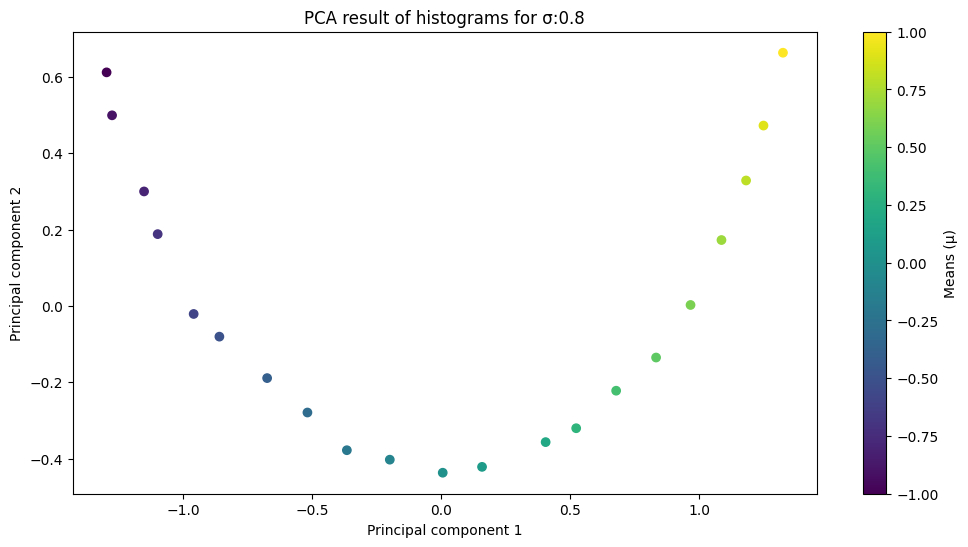

Largest eigen values for σ = 0.8:[0.84289836 0.1320258 ]


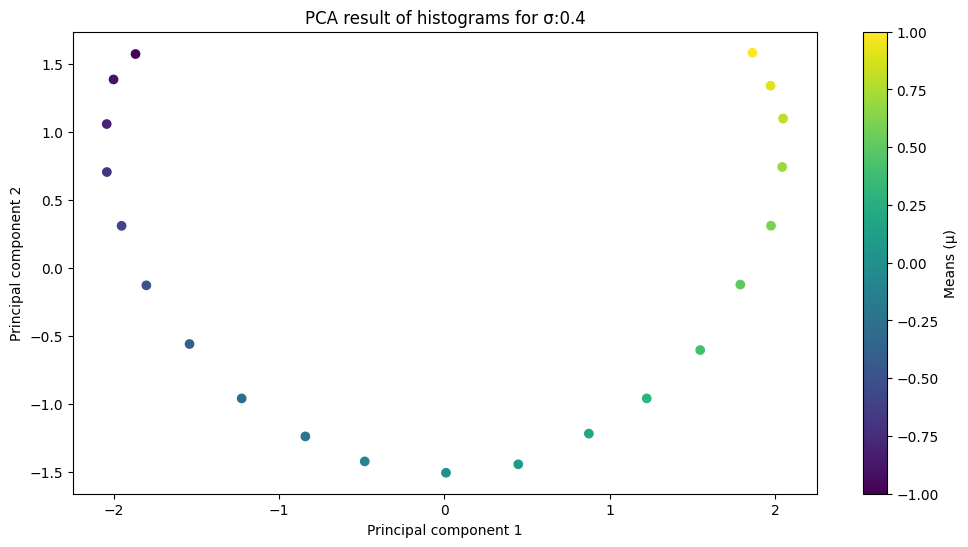

Largest eigen values for σ = 0.4:[2.77271108 1.21099358]


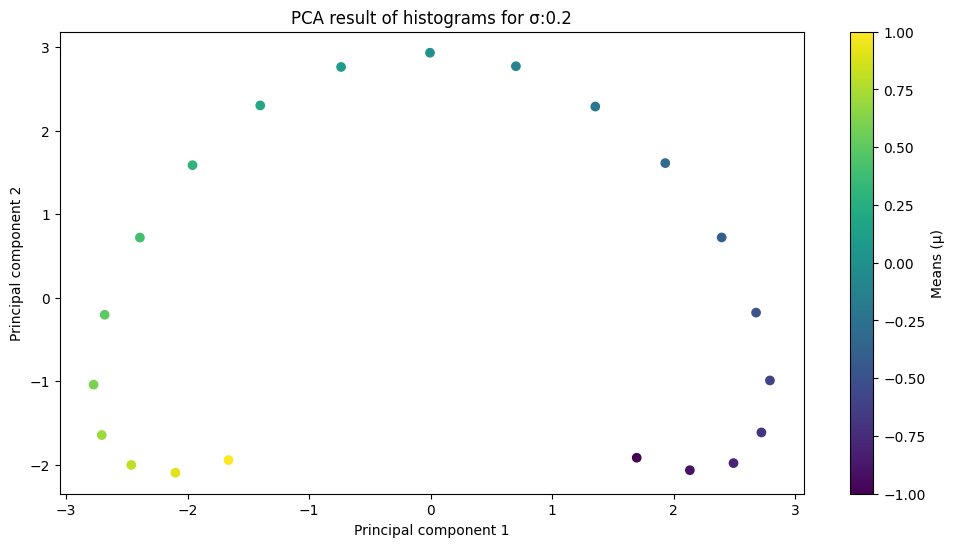

Largest eigen values for σ = 0.2:[4.76727715 3.6075713 ]


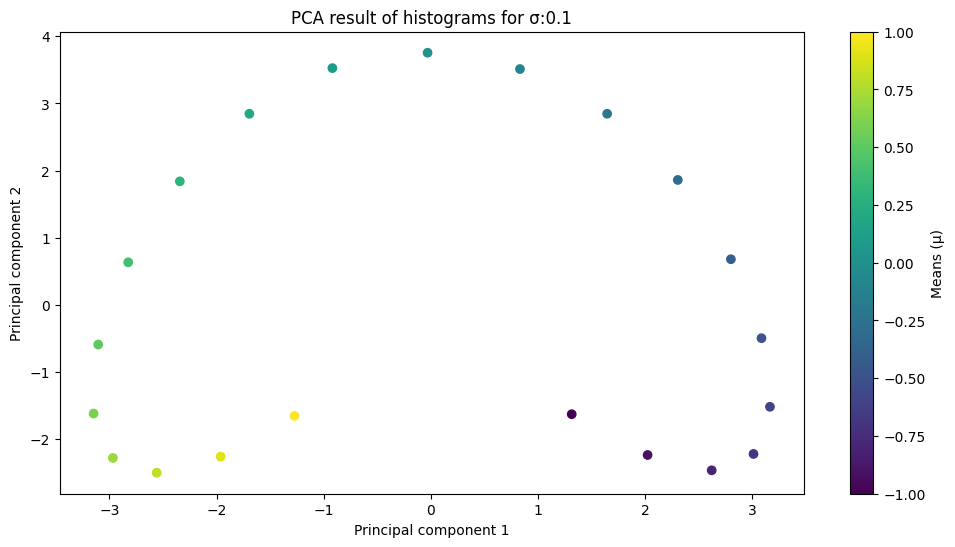

Largest eigen values for σ = 0.1:[5.77232879 5.3180741 ]


In [194]:
# Plotting the PCA result based on each sigma value
eigen_values_dict = {}
for sigma in stds:
    histograms_list = all_histograms[sigma] 
    pca_result, eigen_values = analyze_histogram_with_pca(histograms_list)
    eigen_values_dict[sigma] = eigen_values

    plt.figure(figsize = (12, 6))
    plt.scatter(pca_result[:, 0], pca_result[:, 1], c = means)
    plt.colorbar(label = 'Means (μ)')
    plt.title(f"PCA result of histograms for σ:{sigma}")
    plt.xlabel("Principal component 1")
    plt.ylabel("Principal component 2")
    plt.show()

    #Printing the explained variance
    print(f'Largest eigen values for σ = {sigma}:{eigen_values}')

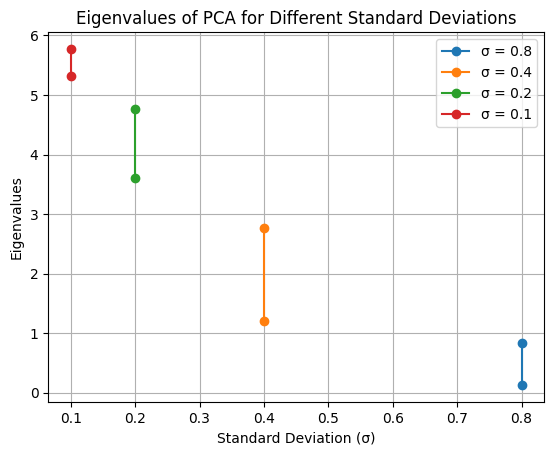

In [193]:
#Plotting Eigen values for different sigma.
for sigma in stds:
    eigen_values_to_plot = eigen_values_dict[sigma]
    plt.plot([sigma] * len(eigen_values_to_plot), eigen_values_to_plot, 'o-', label = f'σ = {sigma}')

# Add labels and legend
plt.xlabel('Standard Deviation (σ)')
plt.ylabel('Eigenvalues')
plt.title('Eigenvalues of PCA for Different Standard Deviations')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

Answer:....